# HW1 - Python and Probability

In this module, we will be using what you learned in class about python and probability and practice using the git workflow to submit assignments in this class. 

In [147]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
%matplotlib inline
import string

### 1. Create a list of 1000 normally-distributed numbers with mean 10 and variance 5 and assign it to a variable

$$ X \sim N(10, 5) $$

For this, you can use the `scipy.stats.norm` function. You can find the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Look for the example that tells you how to generate random numbers!

Also, be careful about your `scale` parameter -- remember, you want a *variance* of 5 here. Another thing to watch out here is that we've imported the entire `scipy.stats` module. Keep that in mind when trying to figure out how to access functions within a module.

##### [10] pts

In [148]:
std = math.sqrt(5)
norm_list = stats.norm.rvs(loc=10, scale=std, size=1000)
print(norm_list)

[10.47184561 14.84509046 11.74781902  9.64460288  9.75738041 10.26055785
 10.00548585  6.89764261  6.78756158  9.00895407  9.89543587  9.04606983
 15.47962676 11.33494772  7.29742469 11.83164868 10.7652406  12.62371016
 12.90908462  7.81645292 12.82424177  8.07270682  7.9450726   8.35300008
 10.93145984  7.85399506 11.62702445 13.24697776 10.98145942  6.60416155
 12.27524624 15.62618049  7.69569583  8.01921424 10.41840875  8.96052416
 10.32398146 14.95886112 11.05288908 12.60194802  6.04544265 11.17789248
 10.46194746  7.95592918 12.53972658 11.0271642  10.86228353  9.72754695
  8.40398424 11.93373691 13.33585664 10.28436667  6.70146966 11.81220551
 12.66151678  6.31909122 11.11196312  9.4133851  10.41409698 10.19848516
 10.26542226 13.55588965  9.82239798  8.21604246 10.50787855 12.29662175
 11.896148    6.43277787  5.11527181  9.23087396  6.68221515  8.19667874
 13.39378501 10.92473154 12.61826746 14.86849857  7.32121244  9.93256606
 10.27320611  9.57377265 14.50758602  9.98411574 10

### 2. Check the *empirical* mean and variance of this distribution by using the `mean` and `std` functions from the `numpy` library on your list.

##### [5] pts

In [149]:
## Mean:
mean = np.mean(norm_list)
print(mean)

10.042962660779136


##### [5] pts

In [150]:
## Variance:
var = np.var(norm_list)
print(var)

5.034582150436372


### 3. The Multivariate Normal

For this step, we're going to emulate draws from a bivariate normal distribution (a 2-dimensional normal distribution). As you remember from class, the multivariate normal distribution can be expressed by a mean vector and a covariance matrix. However, we can also build our *own* bivariate normal by generating correlated values to the values that you generated above.

The random normal values that you generated before were distributed

$$X \sim N(10, 5)$$ 
(This notation means the random variable X is distributed Normally with mean 10, and variance 5)

Let's say that we want to generate another set of 1000 Normal random variables. However, we want them to be *correlated* with your current list. At the end, we would like the *joint* distribution of the two lists to have some non-zero *covariance*. To read more about the difference between a correlation and a covariance, click [here](http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_5.html)

At the end, we would like the *joint* distribution of the two lists to follow the following:

$$ \begin{bmatrix}X\\Y\end{bmatrix} \sim N(\begin{bmatrix}10 \\50 \end{bmatrix}, \begin{bmatrix}  5&8\\8&20\end{bmatrix})$$

which follows the following structure:

$$ \begin{bmatrix}X\\Y\end{bmatrix} \sim N(\begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}, \begin{bmatrix} \sigma_x^2 & \rho\sigma_x\sigma_y \\ \rho\sigma_y\sigma_x & \sigma_y^2 \end{bmatrix})$$

The diagonals of the covariance matrix are the respective variances of the two normal distributions that make up the bivariate normal. The diagonal elements represent the covariance between the two (this generalizes in *k* dimensions).

The covariance in this case is 8. However, we will need to convert this to a correlation for later. The relationship between the covariance and the correlation is given as follows:

$$ Cov_{xy} = \rho_{xy}\sigma_x\sigma_y $$

where $\rho_{xy}$ is the correlation between $x$ and $y$

##### [5] pts

In [151]:
# Compute the correlation between X and Y in the 
# multivariate normal distribution above and print it here:
std1 = math.sqrt(5)
std2 = math.sqrt(20)
correlation = 8/(std1*std2)
print(correlation)

0.7999999999999998


We now want to generate a new set of 1000 normally distributed variables. However, we want to generate them based on the values of our old list. For each number $x$ generated in your old list, generate a new number which is drawn from the following distribution:

$$ y \sim N((\mu_y + \rho(\frac{\sigma_y}{\sigma_x})(x-\mu_x)), \sigma^2_y (1-\rho^2)) $$

where $\rho$ is the *correlation* between the two normal distributions that you calculated above, $\mu_y$ is the mean of Y, and $\sigma$ represents the standard deviation. Store the results in another list of 1000 numbers. We will do this in two different ways: Please complete the boilerplate code below

#### Method 1 -- build a list iteratively [10 pts]

In [152]:
## This first method will involve constructing 
## an array iteratively using a for loop:

cond_normal_array1 = []
for v in norm_list:
    """
    Compute a new number depending on the value in normlist
    and append it to cond_normal_array1
    """
    # Your code here
    
    y_mean = 50+1.6*(v-10)
    y_std = math.sqrt(7.2)
    y = stats.norm.rvs(loc=y_mean, scale=y_std, size=1)
    cond_normal_array1.append(float(y))
    
cond_normal_array1


[50.36121123215309,
 56.553235370829206,
 52.42523970604267,
 50.48763723142259,
 49.014003293444425,
 52.058655289625015,
 52.42070621426267,
 42.863686013378306,
 45.590204421159335,
 45.74619675334637,
 49.700349833884744,
 46.3940917033832,
 56.21719801017405,
 55.96965814921319,
 47.09634824387088,
 50.68033917122024,
 53.5463911301885,
 51.11053390710138,
 51.69776117282914,
 47.521271995516514,
 59.42594208930545,
 46.85857727993802,
 47.171172808714076,
 41.454346131101296,
 49.68432694050583,
 43.548116845653425,
 48.54008494645133,
 57.382378093189374,
 51.58596171312203,
 44.816380315976005,
 53.27608339497441,
 61.69574505941014,
 45.721499980451185,
 49.15683976948376,
 50.149642213436934,
 50.51312605996242,
 54.14594210857913,
 55.14327169911361,
 49.35926711916323,
 54.983776221038276,
 45.12357850157405,
 52.42515600879071,
 51.18134447277255,
 52.01685845385123,
 49.65650137353654,
 50.44086370190016,
 51.34068208564792,
 52.14840917293755,
 47.349747027011446,
 52.90

Verify that the mean and variance of the numbers that you generated match the expected distribution of $Y$

In [153]:
# Find the mean 

mean2 = np.mean(cond_normal_array1)
mean2

50.162890434652205

In [154]:
# And variance

var2=np.var(cond_normal_array1)
var2

20.355165469151757

#### Method 2 - List Comprehension [10 pts]

This method will involve writing a function that operates on a single value, and then we will apply that in a list comprehension to generate the new list


In [155]:
def gen_cond_normal_val(x, y_mean, x_mean, y_std, x_std, rho):
    """
    This function returns a draw from a conditional normal distribution with the specified parameters
    Args: (all Args numeric)
        x: Observed value
        y_mean: mean of Y distribution
        x_mean: mean of X distribution
        y_std: standard deviation of Y distribution
        x_std: standard deviation of X distribution
        rho: correlation between X and Y
    Returns: 
        
    """
    cond_normal_array2 = stats.norm.rvs(loc=y_mean+rho*(y_std/x_std)*(x-x_mean), scale=math.sqrt(y_std**2*(1-rho**2)), size=1)
    return float(cond_normal_array2)
    #pass #replace this with a return 

In [156]:
cond_normal_array2 = [gen_cond_normal_val(x, mean2, mean, std2, std1, correlation) for x in norm_list] 
# replace the ... with your parameter values
cond_normal_array2

[50.94534570313834,
 60.76708703085639,
 54.53497627679265,
 45.31383426205313,
 48.23934929610209,
 51.863987002801565,
 50.727316106732935,
 43.53557551540877,
 42.67639890424995,
 49.42674464230761,
 50.94105116399425,
 43.56614921821579,
 59.26525175180019,
 57.017285845853095,
 44.39663550837273,
 58.71117309771235,
 48.95329481989173,
 55.313234510737466,
 47.855649922578834,
 46.234090189053205,
 53.61625098298067,
 49.71551643462277,
 46.37819630847897,
 53.36032601833832,
 50.57490215877696,
 46.39487763947501,
 56.30177238048744,
 54.96569541227904,
 54.13613772740398,
 40.339054002187005,
 54.38995207163748,
 52.19093326051994,
 42.0035117821424,
 45.66451176681292,
 52.91132747973457,
 49.01319131955855,
 51.52562637377785,
 59.24371413327857,
 52.55363718472951,
 56.888902632628515,
 37.03662044610128,
 51.15862215202145,
 51.09595706579817,
 46.43012340242693,
 55.294083720703064,
 51.54571113456108,
 51.45028862517659,
 46.16596897639894,
 47.84642212411746,
 54.46502983

### 4. Strings and Discrete Distributions

In this section, we will use strings and dictionaries to create a draw from a discrete distribution. 

First, take the following string and perform the following operations and save it back to the same variable:

 1. Remove all whitespace (spaces)
 2. Remove all periods `.` and commas `,`
 3. Make every letter lowercase
 

##### [5] pts

In [157]:
lorem_string = "loremipsumdolorsitametconsecteturadipiscingelitseddoeiusmodtemporincididuntutlaboreetdoloremagnaaliquautenimadminimveniamquisnostrudexercitationullamcolaborisnisiutaliquipexeacommodoconsequatduisauteiruredolorinreprehenderitinvoluptatevelitessecillumdoloreeufugiatnullapariaturexcepteursintoccaecatcupidatatnonproidentsuntinculpaquiofficiadeseruntmollitanimidestlaborum"

In [158]:
# Perform the operations listed above and save it back to lorem_string

Next, create a dictionary where the `keys` are each of the letters of the english alphabet and the `values` are the number of times it appears in the following string. Assign this to a variable called `result_dict`:

##### [10 pts]

In [159]:
result_dict = {}
# Your code here:
for keys in lorem_string:
    values = lorem_string.count(keys)
    result_dict[keys] = values
result_dict 

{'l': 22,
 'o': 29,
 'r': 22,
 'e': 38,
 'm': 17,
 'i': 42,
 'p': 11,
 's': 18,
 'u': 29,
 'd': 19,
 't': 32,
 'a': 29,
 'c': 16,
 'n': 24,
 'g': 3,
 'b': 3,
 'q': 5,
 'v': 3,
 'x': 3,
 'h': 1,
 'f': 3}

if you did everything correctly, this should output a plot!

<BarContainer object of 21 artists>

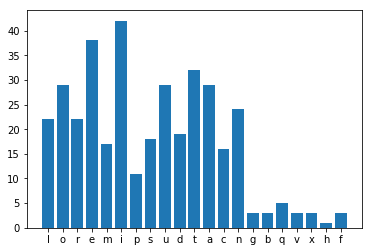

In [160]:
# Run this line to plot the counts
plt.bar(list(result_dict.keys()), list(result_dict.values()))

Next, we're going to create a discrete distribution from what you saw in `result_dict`. We will take the counts of values as you observed as defining the distribution. In order to make it look more like a distribution, we need to *normalize* the counts. Recall that probability distributions must sum up to 1. So, we need to make the values in `result_dict` sum up to 1, but to keep the ratio between each of the values. To do this, simply divide every element by the sum of all of the elements. Return this new dictionary as `normalized_dict`

##### [10] pts

In [161]:
# Your code here
normalized_dict = {}

s = sum(result_dict.values())
    
for values in result_dict:  
    normalized_dict[values] = result_dict[values]/s

normalized_dict



{'l': 0.05962059620596206,
 'o': 0.07859078590785908,
 'r': 0.05962059620596206,
 'e': 0.10298102981029811,
 'm': 0.04607046070460705,
 'i': 0.11382113821138211,
 'p': 0.02981029810298103,
 's': 0.04878048780487805,
 'u': 0.07859078590785908,
 'd': 0.051490514905149054,
 't': 0.08672086720867209,
 'a': 0.07859078590785908,
 'c': 0.04336043360433604,
 'n': 0.06504065040650407,
 'g': 0.008130081300813009,
 'b': 0.008130081300813009,
 'q': 0.013550135501355014,
 'v': 0.008130081300813009,
 'x': 0.008130081300813009,
 'h': 0.0027100271002710027,
 'f': 0.008130081300813009}

Next, recall that a Random Variable is a function that maps events from the sample space (here, this is the letters) to real numbers. We're going to define a random variable $X$ that takes on the values as defined by the following dictionary (any letter which does not show up in our `normalized_dict` you can ignore.

In [96]:
letter_dict = dict(zip(string.ascii_lowercase, range(1, len(string.ascii_lowercase)+1)))
letter_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

Assume that the probabilities that you see in `normalized_dict` are the result of evaluating a probability mass function for drawing letters. Each of the letter draws is now represented by a number according to `letter_dict`. Using this information, compute the Expected Value of the distribution. In addition, write code the implements both forms of the variance formula below and verify that they are indeed equivalent.
$$ E(X) = \sum_ix_iP(x_i) $$
$$ Var(X) = \sum_i(x_i-E(X))^2P(x_i)$$
$$ or $$
$$Var(X)= E(X^2) - E(X)^2 $$

##### [10] pts each

In [120]:
# Expectation - Your code here

expectation=0

for keys in normalized_dict:  
    exp = normalized_dict[keys]*letter_dict[keys]
    expectation = expectation + exp

expectation


11.96747967479675

In [121]:
# Variance Equation # 1 - Your code here
Variance1 = 0

for keys in normalized_dict:  
    Var1 = (letter_dict[keys]-expectation)**2*normalized_dict[keys]
    Variance1 = Variance1 + Var1
    
Variance1

44.00436248264922

In [125]:
# Variance Equation # 2 - Your code here
expectation2 = 0

for keys in normalized_dict:  
    exp2 = (letter_dict[keys])**2*normalized_dict[keys]
    expectation2 = expectation2 + exp2

Variance2 = expectation2-expectation**2

Variance2

44.004362482649185